In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from astropy import constants
from astropy import units as u

from pycbc import waveform

In [2]:
def analytic_remaining_time(r0, M1, M2):
    M = M1 + M2
    mu = M1 * M2 / M
    return 5 * np.power(constants.c, 5) * np.power(r0, 4) / (256 * np.power(constants.G, 3) * mu * np.power(M, 2))

def analytic_remaining_time_from_freq(Omega0, M1, M2):
    first_term = 5 * np.power(constants.c, 5) / (256 * np.power(constants.G, 3) * (M1 + M2) * M1 * M2)
    second_term = np.power(constants.G * (M1 + M2) / np.power(Omega0, 2), 4/3)
    return first_term * second_term

def analytic_radius(t, M1, M2):
    M = M1 + M2
    mu = M1 * M2 / M
    alpha = 5 * np.power(constants.c, 5) / (256 * np.power(constants.G, 3))
    return np.power(-mu * np.power(M, 2) / alpha * t, 1/4)

def analytic_radial_freq(t, M1, M2):
    M = M1 + M2
    mu = M1 * M2 / M
    alpha = 5 * np.power(constants.c, 5) / (256 * np.power(constants.G, 3))
    return np.sqrt(constants.G * M) * np.power(-mu * np.power(M, 2) * t / alpha, -3/8)

### Let's first do just a rescaling of the time coordinates that PyCBC outputs, no translation

In [3]:
M1 = 100 * constants.M_sun
M2 = 100 * constants.M_sun
M_tot = M1 + M2

omegas = list(range(3, 30, 3))
data = []

for omega_0 in tqdm(omegas):
    omega_0 = omega_0 / u.s
    hp, hc = waveform.get_td_waveform(approximant='SEOBNRv2',
                                    mass1=M1 / constants.M_sun,
                                    mass2=M2 / constants.M_sun,
                                    delta_t=1/4096,
                                    f_lower=omega_0.value / np.pi,
                                    distance=1000)
    amps = waveform.utils.amplitude_from_polarizations(hp, hc)
    times, amps = amps.sample_times, amps
#     times = times - times[0] # t = 0 at orbital angular freq omega_0
    
    tau = 2 * constants.G * M_tot / np.power(constants.c, 3)
#     translation = (5 * np.power(constants.c, 5)) / \
#                         (256 * np.power(constants.G, 3) * M1 * M2 * M_tot) * \
#                         np.power(constants.G * M_tot / np.power(omega_0, 2), 4/3)

#     times = (times - translation.value) / tau
    times = times / tau
    data.append((times, amps))

  0%|          | 0/9 [00:00<?, ?it/s]

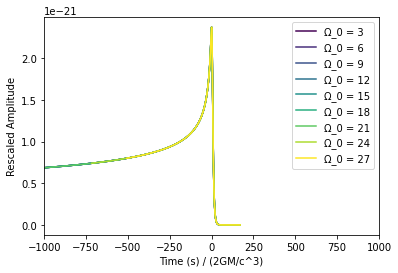

In [4]:
colors = plt.cm.viridis(np.linspace(0, 1, len(omegas)))
for i, (omega_0, (times, amps)) in enumerate(zip(omegas, data)):
    plt.plot(times, amps, label=f"Ω_0 = {omega_0}", color=colors[i])

plt.xlabel("Time (s) / (2GM/c^3)")
plt.ylabel("Rescaled Amplitude")
plt.xlim(-1000, 1000)
plt.legend()

In [5]:
omega_0 = 10
masses = list(range(20, 200, 30))
data = []

for M in tqdm(masses):
    M1 = M * constants.M_sun
    M2 = M * constants.M_sun
    M_tot = M1 + M2
    omega_0 = omega_0 / u.s
    hp, hc = waveform.get_td_waveform(approximant='SEOBNRv2',
                                    mass1=M1 / constants.M_sun,
                                    mass2=M2 / constants.M_sun,
                                    delta_t=1/4096,
                                    f_lower=omega_0.value / np.pi,
                                    distance=1000)
    amps = waveform.utils.amplitude_from_polarizations(hp, hc)
    times, amps = amps.sample_times, amps
#     times = times - times[0] # t = 0 at orbital angular freq omega_0
    
    tau = 2 * constants.G * M_tot / np.power(constants.c, 3)
#     translation = (5 * np.power(constants.c, 5)) / \
#                         (256 * np.power(constants.G, 3) * M1 * M2 * M_tot) * \
#                         np.power(constants.G * M_tot / np.power(omega_0, 2), 4/3)

#     times = (times - translation.value) / tau
    times = times / tau
    amps = amps / (M_tot / constants.M_sun)
    data.append((times, amps))

  0%|          | 0/6 [00:00<?, ?it/s]

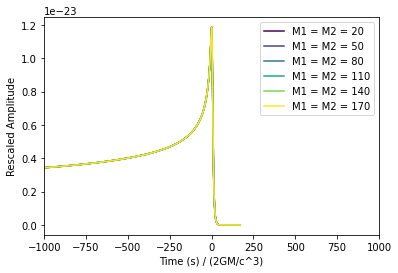

In [6]:
colors = plt.cm.viridis(np.linspace(0, 1, len(masses)))
for i, (mass, (times, amps)) in enumerate(zip(masses, data)):
    plt.plot(times, amps, label=f"M1 = M2 = {mass}", color=colors[i])

plt.xlabel("Time (s) / (2GM/c^3)")
plt.ylabel("Rescaled Amplitude")
plt.xlim(-1000, 1000)
plt.legend()

In [7]:
M1 = 100 * constants.M_sun
M2 = 100 * constants.M_sun
M_tot = M1 + M2

omegas = list(range(5, 30, 5))
data = []

for omega_0 in tqdm(omegas):
    omega_0 = omega_0 / u.s
    hp, hc = waveform.get_td_waveform(approximant='SEOBNRv2',
                                    mass1=M1 / constants.M_sun,
                                    mass2=M2 / constants.M_sun,
                                    delta_t=1/4096,
                                    f_lower=omega_0.value / np.pi,
                                    distance=1000)
    amps = waveform.utils.amplitude_from_polarizations(hp, hc)
    times, amps = amps.sample_times, amps
    print(f"PyCBC time remaining: {abs(times[0])}")
    times = times - times[0] # t = 0 at orbital angular freq omega_0
    
    tau = 2 * constants.G * M_tot / np.power(constants.c, 3)
    translation = (5 * np.power(constants.c, 5)) / \
                        (256 * np.power(constants.G, 3) * M1 * M2 * M_tot) * \
                        np.power(constants.G * M_tot / np.power(omega_0, 2), 4/3)
    print(f"Our formula remaining: {translation}")

    times = (times - translation.value) / tau
    data.append((times, amps))

  0%|          | 0/5 [00:00<?, ?it/s]

PyCBC time remaining: 110.754089348
Our formula remaining: 109.58156131500968 s
PyCBC time remaining: 16.790542595
Our formula remaining: 17.258014472640802 s
PyCBC time remaining: 5.424407952
Our formula remaining: 5.853479989636581 s
PyCBC time remaining: 2.390762322
Our formula remaining: 2.717966964183815 s
PyCBC time remaining: 1.252780728
Our formula remaining: 1.499054672383554 s


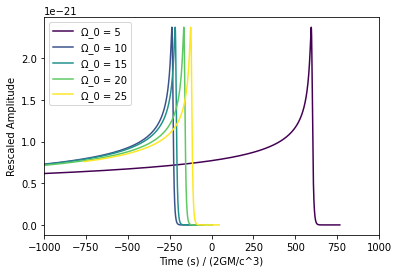

In [8]:
colors = plt.cm.viridis(np.linspace(0, 1, len(omegas)))
for i, (omega_0, (times, amps)) in enumerate(zip(omegas, data)):
    plt.plot(times, amps, label=f"Ω_0 = {omega_0}", color=colors[i])

plt.xlabel("Time (s) / (2GM/c^3)")
plt.ylabel("Rescaled Amplitude")
plt.xlim(-1000, 1000)
plt.legend()

In [9]:
omega_0 = 10
masses = list(range(20, 200, 30))
data = []

for M in tqdm(masses):
    M1 = M * constants.M_sun
    M2 = M * constants.M_sun
    M_tot = M1 + M2
    omega_0 = omega_0 / u.s
    hp, hc = waveform.get_td_waveform(approximant='SEOBNRv2',
                                    mass1=M1 / constants.M_sun,
                                    mass2=M2 / constants.M_sun,
                                    delta_t=1/4096,
                                    f_lower=omega_0.value / np.pi,
                                    distance=1000)
    amps = waveform.utils.amplitude_from_polarizations(hp, hc)
    times, amps = amps.sample_times, amps
    times = times - times[0] # t = 0 at orbital angular freq omega_0
    
    tau = 2 * constants.G * M_tot / np.power(constants.c, 3)
    translation = (5 * np.power(constants.c, 5)) / \
                        (256 * np.power(constants.G, 3) * M1 * M2 * M_tot) * \
                        np.power(constants.G * M_tot / np.power(omega_0, 2), 4/3)
    times = (times - translation.value) / tau
    amps = amps / (M_tot / constants.M_sun)
    data.append((times, amps))

  0%|          | 0/6 [00:00<?, ?it/s]

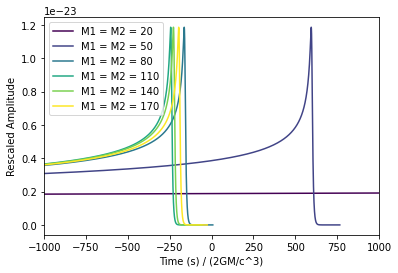

In [10]:
colors = plt.cm.viridis(np.linspace(0, 1, len(masses)))
for i, (mass, (times, amps)) in enumerate(zip(masses, data)):
    plt.plot(times, amps, label=f"M1 = M2 = {mass}", color=colors[i])

plt.xlim(-1000, 1000)
plt.xlabel("Time (s) / (2GM/c^3)")
plt.ylabel("Rescaled Amplitude")
plt.legend()

### Let's look at the error between the true frequency and the analytic frequency (although I'm not sure how PyCBC sets t=0 so maybe this is not a meaningful comparison)

0.7082043053948942


/home/eric/miniconda3/envs/chirps/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


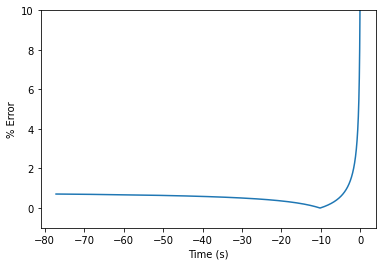

In [11]:
hp, hc = waveform.get_td_waveform(approximant='SEOBNRv2',
                                mass1=20,
                                mass2=20,
                                delta_t=1e-3,
                                f_lower=5.0)
freqs = waveform.utils.frequency_from_polarizations(hp, hc)
analytic_freqs = (1 / np.pi) * analytic_radial_freq(freqs.sample_times*u.s, 20*constants.M_sun, 20*constants.M_sun).value

pct_error = np.abs(freqs - analytic_freqs) / freqs * 100

plt.plot(freqs.sample_times, pct_error)
plt.xlabel("Time (s)")
plt.ylabel("% Error")
plt.ylim(-1, 10)
print(pct_error[0])

This notebook mentions that due to cosmological redshift the waveform is stretched in a manner depending on the distance. Are we properly incorporating this? https://github.com/gwastro/PyCBC-Tutorials/blob/master/tutorial/1_CatalogData.ipynb